In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression , LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
np.random.seed(0)
import random
random.seed(0)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

# plot
from math import sqrt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
from random import randint
import re

#XGBoost
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score

from sklearn import metrics

In [2]:
# Read data from csv file
employee_df = pd.read_csv('survey.csv')

In [3]:
# Display row count and column count of dataset
print('\n Row and Column Count of the Training Data',employee_df.shape)


 Row and Column Count of the Training Data (1259, 27)


In [4]:
# For each attribute in the data, display data type
print('\n Description of Training Data \n', employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
# Check for total how many attributes with null values present
employee_df.isnull().sum()

# NULL values for State, Self_employed, Work_interfere and comments - Need to handle these

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
#Removing columns with high percent of NULL and irrelavent columns from dataframe 
employee_df.drop(axis=1,columns=['comments','state','Timestamp'], inplace=True)

DATA WRANGLING

In [7]:
# Imputing generic values for training data frame
def impute_function(colName, oldValue, newValue):
    col_name = colName
    old_val = oldValue
    new_val = newValue
    
    if col_name=='self_employed':
        employee_df.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='work_interfere':
         employee_df.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Gender':
         employee_df.replace({col_name: old_val},new_val,inplace=True)
            
    elif col_name=='Age':
         employee_df.replace({col_name: old_val},new_val,inplace=True)
    else:
        print('Updated columns')

In [8]:
 
impute_function('self_employed', np.NaN, 'No')
impute_function('work_interfere', np.NaN, 'Unsure')
impute_function('Gender', 'female', 'F')
impute_function('Gender', 'Female', 'F')
impute_function('Gender', 'Female', 'F')
impute_function('Gender', 'femail', 'F')
impute_function('Gender', 'Femail', 'F')
impute_function('Gender', 'Trans-female', 'nah')
impute_function('Gender', 'Female ', 'F')
impute_function('Gender', 'cis-female/femme ', 'F')
impute_function('Gender', 'cis-female/femme', 'F')
impute_function('Gender', 'Trans woman', 'nah')



In [9]:
def impute_Gender(Gender):  
    if re.search('male', Gender):          
            return 'male' 
    elif re.search('cis female', Gender):
            return 'female'
    elif re.search('f', Gender):
            return 'female'
    elif re.search('F', Gender):
            return 'female'
    elif re.search('female', Gender):
            return 'female' 
    elif re.search('Female', Gender):
            return 'female' 
    elif re.search('woman', Gender):
            return 'female'
    elif re.search('Woman', Gender):
            return 'female'
    elif re.search('femake', Gender):
            return 'female'
    elif re.search('female', Gender):
            return 'female'   
    elif re.search('female (cis)', Gender):
            return 'female'
    elif re.search('Female ', Gender):
            return 'female'
    elif re.search(' Female', Gender):
            return 'female'        
    elif re.search('femail', Gender):
            return 'female'
    elif re.search('Female (cis)', Gender):
            return 'female'
        
    elif re.search('m', Gender):
            return 'male'
    elif re.search('M', Gender):
            return 'male'
    elif re.search('male-ish', Gender):
            return 'male'
    elif re.search('maile', Gender):
            return 'male'
    elif re.search('mal', Gender):
            return 'male'
    elif re.search('male (cis)', Gender):
            return 'male'
    elif re.search('make', Gender):
            return 'male'
    elif re.search('Male', Gender):
            return 'male'
    elif re.search('male', Gender):
            return 'male'
    elif re.search('man', Gender):
            return 'male'
    elif re.search('msle', Gender):
            return 'male'
    elif re.search('Msle', Gender):
            return 'male'
    elif re.search('mail', Gender):
            return 'male'
    elif re.search('malr', Gender):
            return 'male'    
    elif re.search('cis man', Gender):
            return 'male'
    elif re.search('mail', Gender):
            return 'male'
    elif re.search('Malr', Gender):
            return 'male'        
    elif re.search('Cis Male', Gender):
            return 'male'    
    elif re.search('cis male', Gender):
            return 'male'    
    elif re.search('Mal', Gender):
            return 'male'  
      

    elif re.search('Genderqueer', Gender):
            return 'trans' 
    elif re.search('Female (trans)', Gender):
            return 'trans' 
    elif re.search('cis-female/femme', Gender):
            return 'trans' 
    elif re.search('cis-female/femme', Gender):
            return 'trans' 
    elif re.search('trans-female', Gender):
            return 'trans'
    elif re.search('something kinda male?', Gender):
            return 'trans'
    elif re.search('non-binary', Gender):
            return 'trans'
    elif re.search('fluid', Gender):
            return 'trans'
    elif re.search('nah', Gender):
            return 'trans'
    elif re.search('All', Gender):
            return 'trans'
    elif re.search('Agender', Gender):
            return 'trans'
    elif re.search('Cis Female', Gender):
            return 'trans'
    elif re.search('Enby', Gender):
            return 'trans'
    elif re.search('genderqueer', Gender):
            return 'trans'
    elif re.search('androgyne', Gender):
            return 'trans'
    elif re.search('agender', Gender):
            return 'trans'
    elif re.search('male leaning androgynous', Gender):
            return 'trans'
    elif re.search('Guy (-ish) ^_^', Gender):
            return 'trans'
    elif re.search('trans woman', Gender):
            return 'trans'
    elif re.search('queer', Gender):
            return 'trans'
    elif re.search('female (trans)', Gender):
            return 'trans'
    elif re.search('ostensibly male, unsure what that really means', Gender):
            return 'trans'
    elif re.search('Neuter', Gender):
            return 'trans'  
    else:
        return 'trans'


In [10]:
# Invalid data from Gender column are removed
invalid_List = ['A little about you', 'p']
employee_df = employee_df[~employee_df['Gender'].isin(invalid_List)]

#Impute Gender values
Gender = employee_df['Gender'].str.lower()
        
employee_df['Gender'] = Gender.apply(impute_Gender) 

employee_df['Gender'].unique()


array(['female', 'male', 'trans'], dtype=object)

In [11]:

# impute age <18, age > 100 with median since they consitute 9 records (<1%)
median_age = employee_df['Age'].median();
print('median_age', median_age)

impute_function('Age', np.NaN, median_age)
impute_function('Age', -29, median_age)
impute_function('Age', -1726, median_age)
impute_function('Age', 13, median_age)
impute_function('Age', 5, median_age)
impute_function('Age', 8, median_age)
impute_function('Age', 0, median_age)
impute_function('Age', 11, median_age)
impute_function('Age', -1, median_age)
impute_function('Age', 329, median_age)
impute_function('Age', -1726, median_age)
impute_function('Age', 99999999999, median_age)

bins= [0,20,30,60,80,100]
groups = ["0-20", "21-30", "31-60","61-80", "81-100"]

# Ranges of Age column is added to data
employee_df['age_range'] = pd.cut(employee_df['Age'], bins, labels=groups, 
                               include_lowest=True)

employee_df.head(10)

median_age 31.0


Age  Gender         Country self_employed family_history treatment  \
0   37  female   United States            No             No       Yes   
1   44    male   United States            No             No        No   
2   32    male          Canada            No             No        No   
3   31    male  United Kingdom            No            Yes       Yes   
4   31    male   United States            No             No        No   
5   33    male   United States            No            Yes        No   
6   35  female   United States            No            Yes       Yes   
7   39    male          Canada            No             No        No   
8   42  female   United States            No            Yes       Yes   
9   23    male          Canada            No             No        No   

  work_interfere    no_employees remote_work tech_company  ...  \
0          Often            6-25          No          Yes  ...   
1         Rarely  More than 1000          No           No  ...   
2         Rarely            6-25          No          Yes  ...   
3          Often          26-100          No          Yes  ...   
4          Never         100-500         Yes          Yes  ...   
5      Sometimes            6-25          No          Yes  ...   
6      Sometimes             1-5         Yes          Yes  ...   
7          Never             1-5         Yes          Yes  ...   
8      Sometimes         100-500          No          Yes  ...   
9          Never          26-100          No          Yes  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   
5          Don't know                        No                      No   
6  Somewhat difficult                     Maybe                   Maybe   
7          Don't know                        No                      No   
8      Very difficult                     Maybe                      No   
9          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   
5           Yes        Yes                      No                 Maybe   
6  Some of them         No                      No                    No   
7            No         No                      No                    No   
8           Yes        Yes                      No                 Maybe   
9           Yes        Yes                   Maybe                 Maybe   

  mental_vs_physical obs_consequence age_range  
0                Yes              No     31-60  
1         Don't know              No     31-60  
2                 No              No     31-60  
3                 No             Yes     31-60  
4         Don't know              No     31-60  
5         Don't know              No     31-60  
6         Don't know              No     31-60  
7                 No              No     31-60  
8                 No              No     31-60  
9                Yes              No     21-30  

[10 rows x 25 columns]

In [12]:
# Check for total how many attributes with null values present
employee_df.isnull().sum()


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

DISTRIBUTION OF DATA

[Text(0.5, 1.0, 'Treatment distribution')]

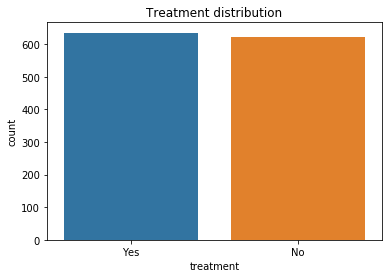

In [13]:
# Distribution for treatment (prediction variable)
f, axes =  plt.subplots(sharex=False, sharey=False)
sns.countplot(x="treatment", data=employee_df).set( title = 'Treatment distribution')

[Text(0.5, 1.0, 'mental_health_consequence distribution')]

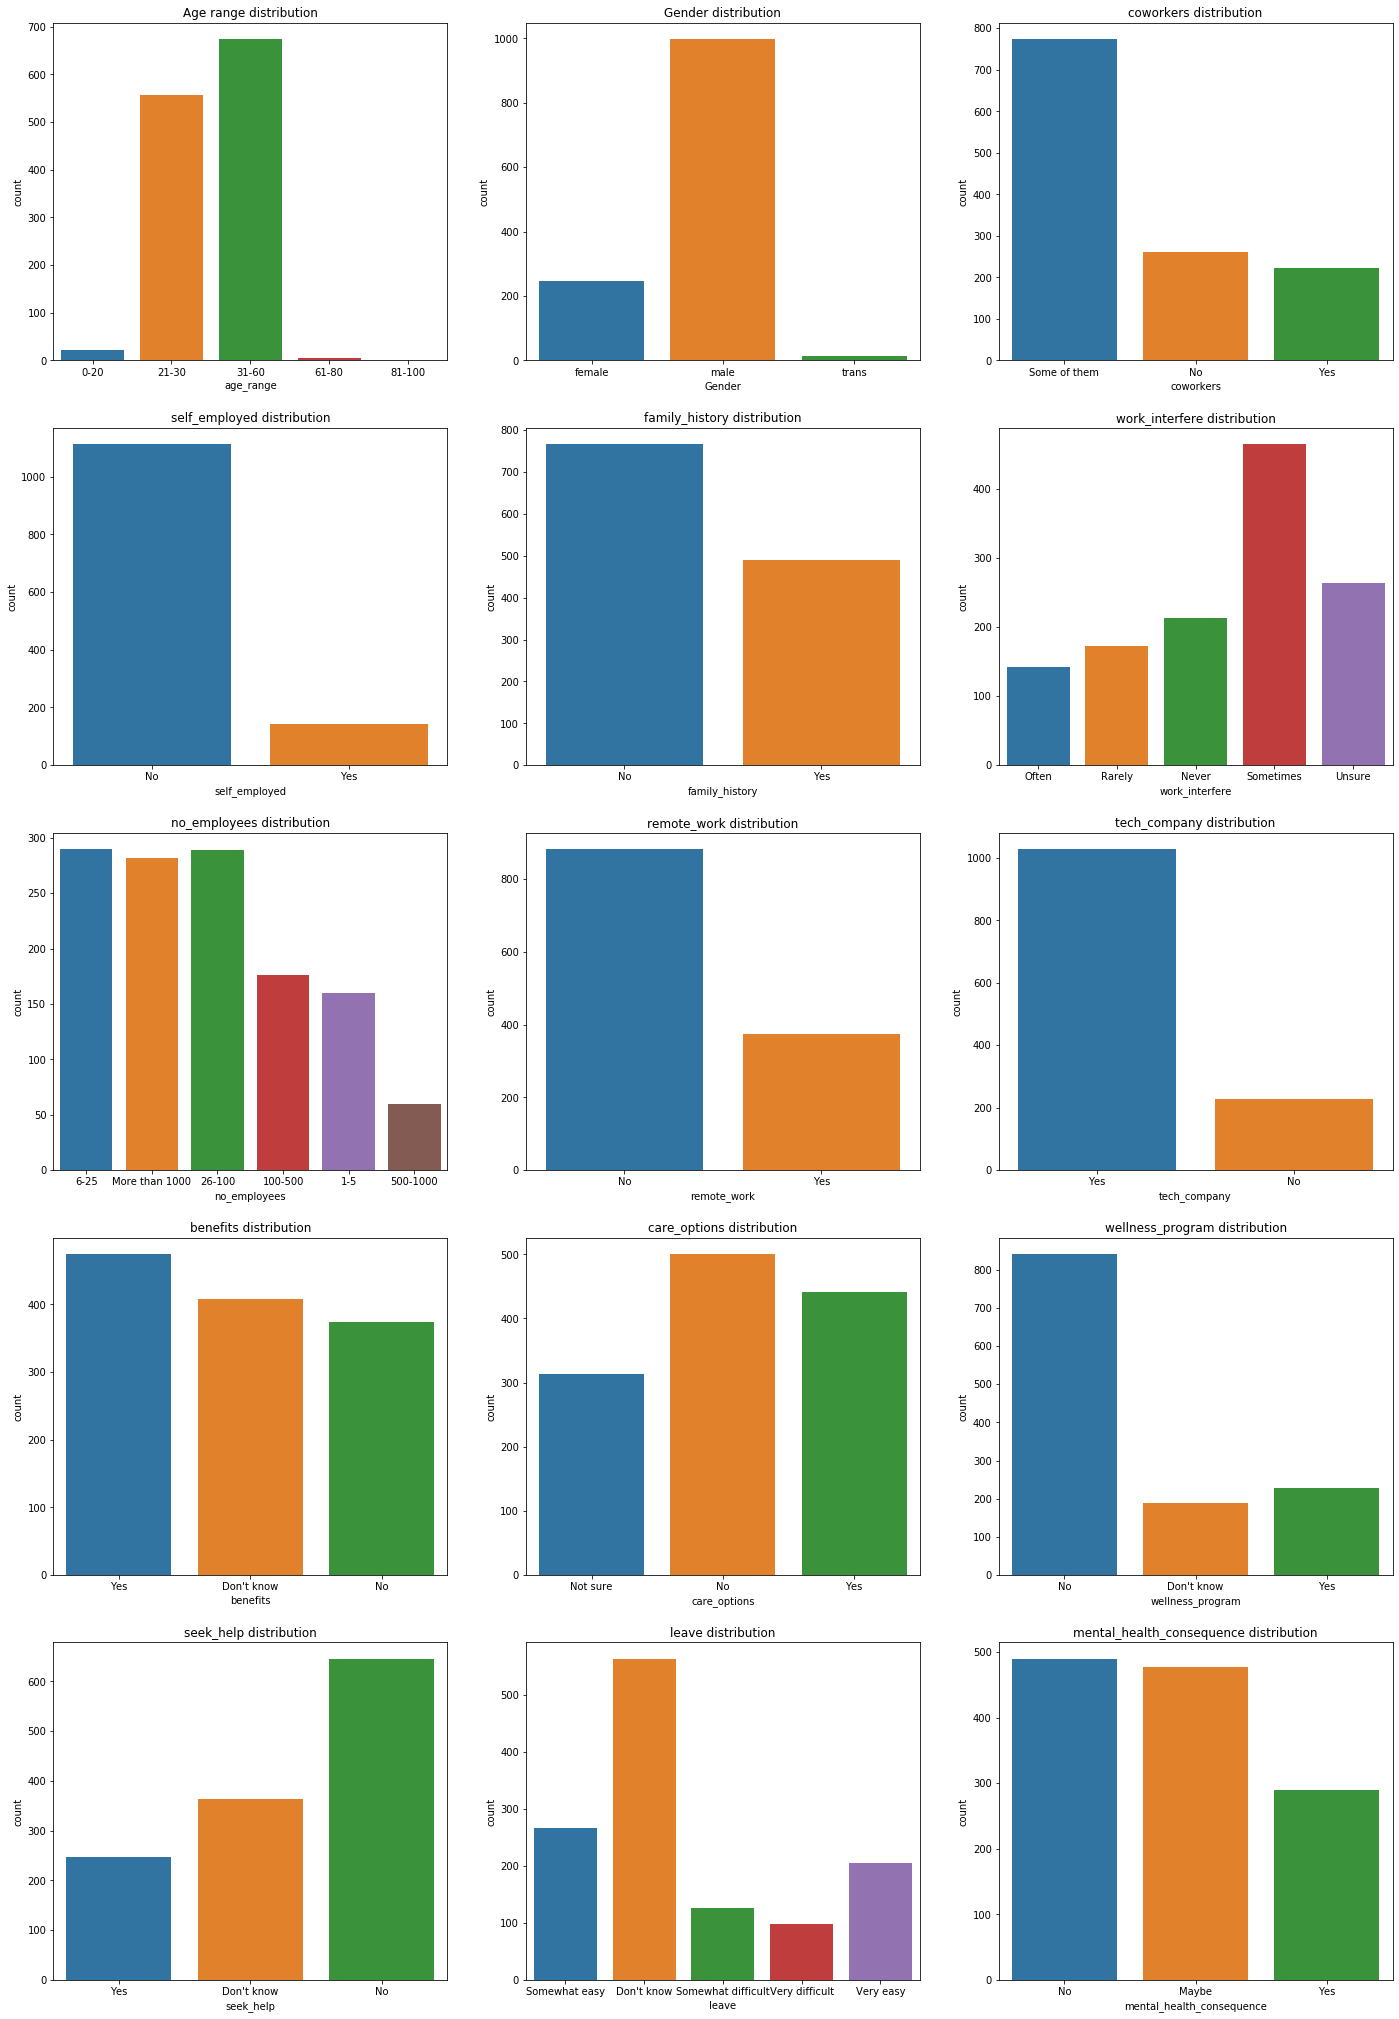

In [14]:
# Bar graphs, 3 by 5, usin the matplotlib library for the distribution of other variables
f, axes = plt.subplots(5, 3, figsize=(24, 36), sharex=False, sharey=False)

sns.countplot(x="age_range", data=employee_df, ax=axes[0,0])
axes[0,0].set( title = 'Age range distribution')

sns.countplot(x="Gender", data=employee_df, ax=axes[0,1])
axes[0,1].set( title = 'Gender distribution')

sns.countplot(x="coworkers", data=employee_df, ax=axes[0,2])
axes[0,2].set( title = 'coworkers distribution')

sns.countplot(x="self_employed", data=employee_df, ax=axes[1,0])
axes[1,0].set( title = 'self_employed distribution')

sns.countplot(x="family_history", data=employee_df, ax=axes[1,1])
axes[1,1].set( title = 'family_history distribution')

sns.countplot(x="work_interfere",data=employee_df, ax=axes[1,2])
axes[1,2].set( title = 'work_interfere distribution')

sns.countplot(x="no_employees", data=employee_df, ax=axes[2,0])
axes[2,0].set( title = 'no_employees distribution')

sns.countplot(x="remote_work", data=employee_df, ax=axes[2,1])
axes[2,1].set( title = 'remote_work distribution')

sns.countplot(x="tech_company", data=employee_df, ax=axes[2,2])
axes[2,2].set( title = 'tech_company distribution')

sns.countplot(x="benefits", data=employee_df, ax=axes[3,0])
axes[3,0].set( title = 'benefits distribution')

sns.countplot(x="care_options", data=employee_df, ax=axes[3,1])
axes[3,1].set( title = 'care_options distribution')

sns.countplot(x="wellness_program",  data=employee_df, ax=axes[3,2])
axes[3,2].set( title = 'wellness_program distribution')

sns.countplot(x="seek_help",  data=employee_df, ax=axes[4,0])
axes[4,0].set( title = 'seek_help distribution')

sns.countplot(x="leave", data=employee_df, ax=axes[4,1])
axes[4,1].set( title = 'leave distribution')

sns.countplot(x="mental_health_consequence", data=employee_df, ax=axes[4,2])
axes[4,2].set( title = 'mental_health_consequence distribution')

LABEL ENCODING

In [15]:
# select all the columns except decision column as features
features = employee_df[employee_df.columns.difference(['treatment'])]
output= employee_df['treatment']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for i in employee_df:
    employee_df[i] = label_encoder.fit_transform(employee_df[i]) 


CORRELATION MATRIX

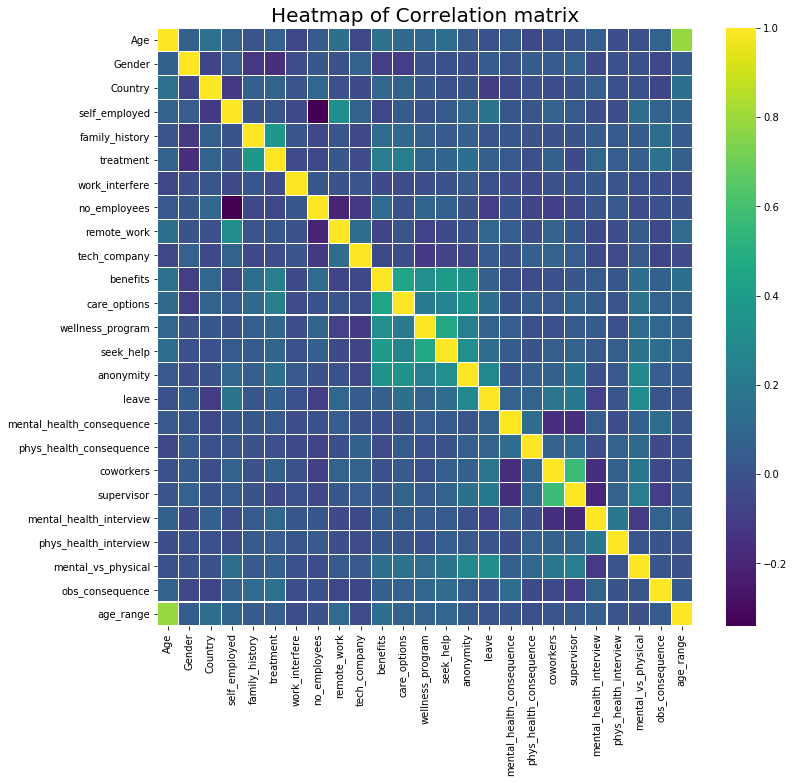

In [16]:
# Correlation matrix showing correlation coefficients between variables.
correlation_matrix = employee_df.corr()
f, ax = plt.subplots(figsize = (12, 11) ) 
plt.title('Heatmap of Correlation matrix', fontsize = 20) 
sns.heatmap(correlation_matrix,ax = ax,cmap="viridis", linewidths = 0.1)

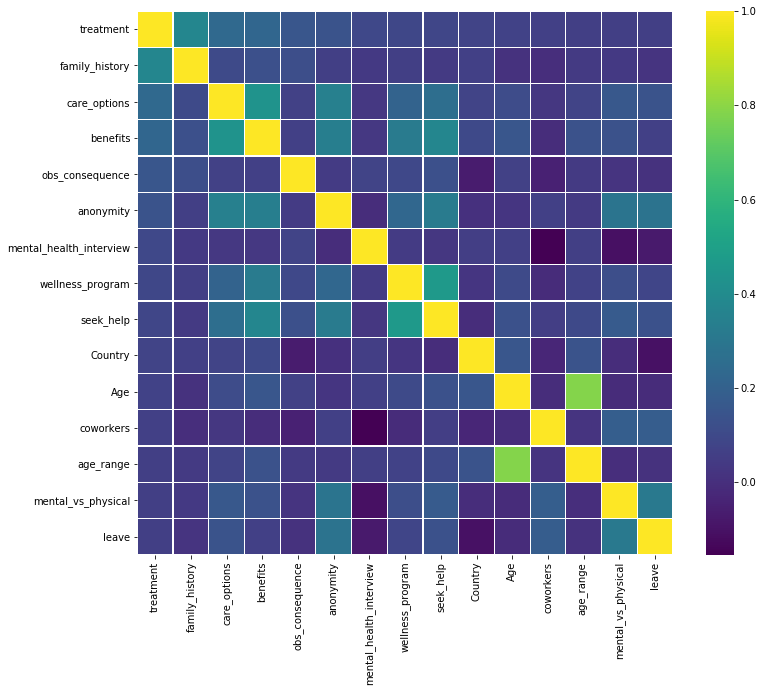

In [17]:
# Check for correlation matrix of the target element - treatment 

k = 15
treatment_col = correlation_matrix.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(employee_df[treatment_col].values.T)
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap="viridis", 
            linewidths = 0.2, yticklabels = treatment_col.values,  
                              xticklabels = treatment_col.values) 

# From Correlation Matrix of Treatment attribute, we can observe a strong correlation of mental health to family_history, care_options

TEST TRAIN DATA SPLIT

In [18]:
# x and y is split into testing and training sets
X = employee_df.drop(['treatment'],axis=1)
Y = employee_df['treatment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [19]:
# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

FEATURE SELECTION USING LASSO Penatly technique to check for attributes with co-efficient 0

In [20]:
# train logistic regression & cross validation
clf_L1 = LogisticRegressionCV(Cs=100, cv=10, penalty='l1', random_state=0, multi_class='ovr', solver='saga', tol=0.001, max_iter=500, n_jobs=-1)
clf_L1.fit(X_train_scaled, Y_train)

print('\nAccuracy using Lasso Logistic Regression and Cross validation= ', clf_L1.score(X_test_scaled,Y_test))


column_labels = X.columns.tolist()
coef = clf_L1.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
print('\nCo-efficients of each attribute using Lasso Logistic Regression and Cross Validation\n')
print(labels_coef)




Accuracy using Lasso Logistic Regression and Cross validation=  0.7108433734939759

Co-efficients of each attribute using Lasso Logistic Regression and Cross Validation

[('Age', 0.0), ('Gender', -0.10667111843263544), ('Country', 0.0), ('self_employed', 0.0), ('family_history', 0.6677582927572815), ('work_interfere', 0.0), ('no_employees', 0.0), ('remote_work', 0.045027111974855275), ('tech_company', 0.0), ('benefits', 0.16726284387261509), ('care_options', 0.30096439506601547), ('wellness_program', 0.0), ('seek_help', 0.0), ('anonymity', 0.0), ('leave', 0.0), ('mental_health_consequence', 0.0), ('phys_health_consequence', 0.0), ('coworkers', 0.12760994541246415), ('supervisor', -0.03710100845984958), ('mental_health_interview', 0.0921607995879337), ('phys_health_interview', 0.0), ('mental_vs_physical', 0.0), ('obs_consequence', 0.22865722513508738), ('age_range', 0.0)]


Over several iterations the below columns got their co-efficients 0 consistently and hence we decided to drop them
('remote_work', 0.0)
('Age', 0.0)
('tech_company', 0.0)
('mental_health_consequence', 0.0)
('self_employed', 0.0)
('seek_help', 0.0)
('no_employees', 0.0)
('phys_health_interview', 0.0)
('Country', 0.0)
('mental_vs_physical', 0.0)


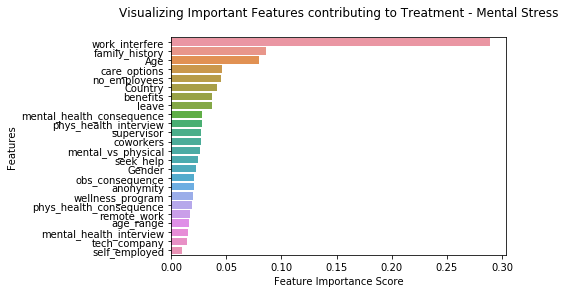

In [21]:
random_clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets
random_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

feature_imp = pd.Series(random_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features contributing to Treatment - Mental Stress\n")
plt.show()

In [22]:
# Based on Lasso Logistic Regression, Random Forest Classifier and Correlation matrix of treatment attribute, 
#the columns that influence the treatment the most are considered

feature_selection = ['work_interfere','family_history','Age','care_options', 'benefits','leave','Country', 'no_employees','Gender']
X = employee_df[feature_selection]
Y = employee_df.treatment

# split X and y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [23]:
# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

# train logistic regression & cross validation
clf_L2 = LogisticRegressionCV(Cs=100, cv=10, penalty='l2', random_state=0, multi_class='ovr', solver='lbfgs', n_jobs=-1)
clf_L2.fit(X_train_scaled, Y_train)
print('Feature Selection - Accuracy using Ridge Logistic Regression and Cross validation= ', clf_L2.score(X_test_scaled,Y_test))

# train logistic regression & cross validation
clf_L1 = LogisticRegressionCV(Cs=100, cv=10, penalty='l1', random_state=0, multi_class='ovr', solver='saga', tol=0.001, max_iter=500, n_jobs=-1)
clf_L1.fit(X_train_scaled, Y_train)

print('Feature Selection - Accuracy using Lasso Logistic Regression and Cross validation= ', clf_L1.score(X_test_scaled,Y_test))


column_labels = X.columns.tolist()
coef = clf_L1.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
print('Co-efficients of each attribute using Lasso Logistic Regression and Cross Validation\n')
print(labels_coef)

l1percentage= clf_L1.score(X_test_scaled,Y_test)* 100
l2percentage = clf_L2.score(X_test_scaled,Y_test)* 100

Feature Selection - Accuracy using Ridge Logistic Regression and Cross validation=  0.6746987951807228
Feature Selection - Accuracy using Lasso Logistic Regression and Cross validation=  0.7180722891566265
Co-efficients of each attribute using Lasso Logistic Regression and Cross Validation

[('work_interfere', 0.0), ('family_history', 0.5942951685923442), ('Age', 0.008814608423981756), ('care_options', 0.19728054437995457), ('benefits', 0.31007476064844053), ('leave', 0.0), ('Country', 0.0), ('no_employees', 0.0), ('Gender', -0.15685018535912396)]


In [24]:
# RandomForest Classifier
clf=RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 137)

#Training the model using the training sets 
clf.fit(X_train_scaled,Y_train)

# prediction on test set
y_pred=clf.predict(X_test_scaled)

rfcpercentage = metrics.accuracy_score(Y_test, y_pred)*100
print("Accuracy:",rfcpercentage)

Accuracy: 82.65060240963855


(2, 0)

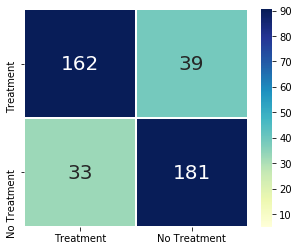

In [25]:
# Create the Confusion Matrix for highest accurate classifier random forest using label encoding
rfcm = confusion_matrix(Y_test, y_pred)

# Creating a graph to show the confusion matrix results
rfcm_plot = pd.DataFrame(rfcm, index = [i for i in {"Treatment", "No Treatment"}],
                  columns = [i for i in {"Treatment", "No Treatment"}])

f, ax=plt.subplots(figsize=(5,4))

sns.heatmap(rfcm_plot, annot=True, vmin=5, vmax=90.5, cbar=True, fmt='', linewidths=.5, cmap="YlGnBu",annot_kws={"size": 20})
ax.set_ylim(2, 0)

In [26]:
# one hot encoding to check any improvement accuray
# Remove Country column as employees stress prediction in work environment it seems irrelevant
features = features[features.columns.difference(['Country'])]

# Since age_range is considered in prediction get rid of redundant column age
features = features[features.columns.difference(['Age'])]

In [27]:
# separate all categorical variables to apply one hot encoding
categorical = []
for col, val in features.iteritems():
    if(val.dtype != 'int64'):
        categorical.append(col)


# Store the numerical columns in a list numerical
numerical = features.columns.difference(categorical)

print(categorical)

['Gender', 'age_range', 'anonymity', 'benefits', 'care_options', 'coworkers', 'family_history', 'leave', 'mental_health_consequence', 'mental_health_interview', 'mental_vs_physical', 'no_employees', 'obs_consequence', 'phys_health_consequence', 'phys_health_interview', 'remote_work', 'seek_help', 'self_employed', 'supervisor', 'tech_company', 'wellness_program', 'work_interfere']


In [28]:
# get the categorical dataframe, and one hot encode it using pandas
categorical_features = features[categorical]
categorical_features = pd.get_dummies(categorical_features, drop_first=True)
categorical_features.head()

Gender_male  Gender_trans  age_range_21-30  age_range_31-60  \
0            0             0                0                1   
1            1             0                0                1   
2            1             0                0                1   
3            1             0                0                1   
4            1             0                0                1   

   age_range_61-80  age_range_81-100  anonymity_No  anonymity_Yes  \
0                0                 0             0              1   
1                0                 0             0              0   
2                0                 0             0              0   
3                0                 0             1              0   
4                0                 0             0              0   

   benefits_No  benefits_Yes  ...  self_employed_Yes  supervisor_Some of them  \
0            0             1  ...                  0                        0   
1            0             0  ...                  0                        0   
2            1             0  ...                  0                        0   
3            1             0  ...                  0                        0   
4            0             1  ...                  0                        0   

   supervisor_Yes  tech_company_Yes  wellness_program_No  \
0               1                 1                    1   
1               0                 0                    0   
2               1                 1                    1   
3               0                 1                    1   
4               1                 1                    0   

   wellness_program_Yes  work_interfere_Often  work_interfere_Rarely  \
0                     0                     1                      0   
1                     0                     0                      1   
2                     0                     0                      1   
3                     0                     1                      0   
4                     0                     0                      0   

   work_interfere_Sometimes  work_interfere_Unsure  
0                         0                      0  
1                         0                      0  
2                         0                      0  
3                         0                      0  
4                         0                      0  

[5 rows x 48 columns]

In [29]:
# get the numerical dataframe
numerical_features = features[numerical]

# concatenate the features
features = pd.concat([numerical_features, categorical_features], axis=1)

features.head()

Gender_male  Gender_trans  age_range_21-30  age_range_31-60  \
0            0             0                0                1   
1            1             0                0                1   
2            1             0                0                1   
3            1             0                0                1   
4            1             0                0                1   

   age_range_61-80  age_range_81-100  anonymity_No  anonymity_Yes  \
0                0                 0             0              1   
1                0                 0             0              0   
2                0                 0             0              0   
3                0                 0             1              0   
4                0                 0             0              0   

   benefits_No  benefits_Yes  ...  self_employed_Yes  supervisor_Some of them  \
0            0             1  ...                  0                        0   
1            0             0  ...                  0                        0   
2            1             0  ...                  0                        0   
3            1             0  ...                  0                        0   
4            0             1  ...                  0                        0   

   supervisor_Yes  tech_company_Yes  wellness_program_No  \
0               1                 1                    1   
1               0                 0                    0   
2               1                 1                    1   
3               0                 1                    1   
4               1                 1                    0   

   wellness_program_Yes  work_interfere_Often  work_interfere_Rarely  \
0                     0                     1                      0   
1                     0                     0                      1   
2                     0                     0                      1   
3                     0                     1                      0   
4                     0                     0                      0   

   work_interfere_Sometimes  work_interfere_Unsure  
0                         0                      0  
1                         0                      0  
2                         0                      0  
3                         0                      0  
4                         0                      0  

[5 rows x 48 columns]

In [30]:
# use the simple label encoder to encode output column 'Treatment'
labelencoder = LabelEncoder()
output = labelencoder.fit_transform(output)
print(output)

[1 0 0 ... 1 0 1]


In [31]:
features_train, features_test, treatment_train, treatment_test = train_test_split(features, output, test_size = 0.3, random_state = 0)

In [32]:
# Apply random forest classifer
r_for = RandomForestClassifier(n_estimators = 800, criterion = 'entropy', random_state = 0)
r_for.fit(features_train, treatment_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
# Obtain the prediction array, 
treatment_pred = r_for.predict(features_test)


# Print the accuracy %
rfpercentage = metrics.accuracy_score(treatment_test, treatment_pred)* 100
print("Accuracy with Random Forest:",rfpercentage)

Accuracy with Random Forest: 81.21693121693121


(2, 0)

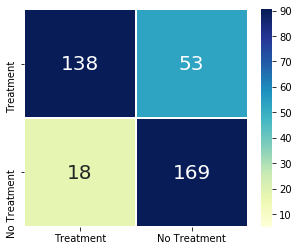

In [34]:
# Create the Confusion Matrix for  random forest using one hot encoding
rf_cm = confusion_matrix(treatment_test, treatment_pred)

# Creating a graph to show the confusion matrix results
rf_cm_plot = pd.DataFrame(rf_cm, index = [i for i in {"Treatment", "No Treatment"}],
                  columns = [i for i in {"Treatment", "No Treatment"}])

f, ax=plt.subplots(figsize=(5,4))

sns.heatmap(rf_cm_plot, annot=True, vmin=5, vmax=90.5, cbar=True, fmt='', linewidths=.5, cmap="YlGnBu",annot_kws={"size": 20})
ax.set_ylim(2, 0)

In [35]:
# Build the Naive Bayes classifier with all the features

n_bayes = GaussianNB()
n_bayes.fit(features_train, treatment_train)

# Obtain the prediction array
treatment_pred = n_bayes.predict(features_test)
    
# Display the accuracy %
nbpercentage = metrics.accuracy_score(treatment_test, treatment_pred)* 100
print("Accuracy with naive bayes:",nbpercentage)

Accuracy with naive bayes: 78.83597883597884


In [36]:
# As knn and svm works only with scaled data scale the features
sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

In [37]:
#  knn classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(features_train_scaled, treatment_train)

treatment_pred = knn.predict(features_test_scaled)

# Get the accuracy %

knnPercentage = metrics.accuracy_score(treatment_test, treatment_pred)* 100
print("Accuracy with knn:",knnPercentage)

Accuracy with knn: 71.42857142857143


In [38]:
# Build the model with svm and fit it to the training data
svc = SVC(kernel = 'rbf', random_state = 0, gamma ='auto')
svc.fit(features_train_scaled,treatment_train)
treatment_pred = svc.predict(features_test_scaled)

# Get the accuracy %

svmpercentage = metrics.accuracy_score(treatment_test, treatment_pred)* 100
print("Accuracy  with svm:",svmpercentage)

Accuracy  with svm: 80.15873015873017


In [39]:
# Import Tensoflow and keras for neural network implementation
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [40]:
# configure the model
nn_model = Sequential()
# Set the input dimension
nn_model.add(Dense(11,activation='relu',input_dim=48))
nn_model.add(Dense(1,activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
nn_model.fit(features_train, treatment_train,epochs=300)

Epoch 1/300
879/879 [==============================] - 0s 102us/step - loss: 0.7600 - accuracy: 0.4937
Epoch 2/300
879/879 [==============================] - 0s 26us/step - loss: 0.6850 - accuracy: 0.5119
Epoch 3/300
879/879 [==============================] - 0s 32us/step - loss: 0.6579 - accuracy: 0.5802
Epoch 4/300
879/879 [==============================] - 0s 31us/step - loss: 0.6356 - accuracy: 0.6325
Epoch 5/300
879/879 [==============================] - 0s 34us/step - loss: 0.6111 - accuracy: 0.7110
Epoch 6/300
879/879 [==============================] - 0s 35us/step - loss: 0.5852 - accuracy: 0.7452
Epoch 7/300
879/879 [==============================] - 0s 31us/step - loss: 0.5591 - accuracy: 0.7679
Epoch 8/300
879/879 [==============================] - 0s 32us/step - loss: 0.5344 - accuracy: 0.7736
Epoch 9/300
879/879 [==============================] - 0s 31us/step - loss: 0.5108 - accuracy: 0.7907
Epoch 10/300
879/879 [==============================] - 0s 31us/step - loss: 0.49

879/879 [==============================] - 0s 31us/step - loss: 0.3041 - accuracy: 0.8726
Epoch 81/300
879/879 [==============================] - 0s 23us/step - loss: 0.3026 - accuracy: 0.8714
Epoch 82/300
879/879 [==============================] - 0s 26us/step - loss: 0.3012 - accuracy: 0.8760
Epoch 83/300
879/879 [==============================] - 0s 28us/step - loss: 0.3044 - accuracy: 0.8714
Epoch 84/300
879/879 [==============================] - 0s 14us/step - loss: 0.3009 - accuracy: 0.8771
Epoch 85/300
879/879 [==============================] - 0s 45us/step - loss: 0.2999 - accuracy: 0.8737
Epoch 86/300
879/879 [==============================] - 0s 33us/step - loss: 0.2984 - accuracy: 0.8783
Epoch 87/300
879/879 [==============================] - 0s 31us/step - loss: 0.2988 - accuracy: 0.8749
Epoch 88/300
879/879 [==============================] - 0s 28us/step - loss: 0.2986 - accuracy: 0.8794
Epoch 89/300
879/879 [==============================] - 0s 26us/step - loss: 0.2965 - 

879/879 [==============================] - 0s 48us/step - loss: 0.2592 - accuracy: 0.8953
Epoch 159/300
879/879 [==============================] - 0s 29us/step - loss: 0.2586 - accuracy: 0.8953
Epoch 160/300
879/879 [==============================] - 0s 26us/step - loss: 0.2583 - accuracy: 0.8942
Epoch 161/300
879/879 [==============================] - 0s 26us/step - loss: 0.2574 - accuracy: 0.8965
Epoch 162/300
879/879 [==============================] - 0s 27us/step - loss: 0.2583 - accuracy: 0.9044
Epoch 163/300
879/879 [==============================] - 0s 27us/step - loss: 0.2580 - accuracy: 0.8953
Epoch 164/300
879/879 [==============================] - 0s 27us/step - loss: 0.2563 - accuracy: 0.8976
Epoch 165/300
879/879 [==============================] - 0s 28us/step - loss: 0.2560 - accuracy: 0.8931
Epoch 166/300
879/879 [==============================] - 0s 26us/step - loss: 0.2551 - accuracy: 0.8987
Epoch 167/300
879/879 [==============================] - 0s 27us/step - loss: 

879/879 [==============================] - 0s 27us/step - loss: 0.2250 - accuracy: 0.9192
Epoch 237/300
879/879 [==============================] - 0s 28us/step - loss: 0.2248 - accuracy: 0.9056
Epoch 238/300
879/879 [==============================] - 0s 29us/step - loss: 0.2246 - accuracy: 0.9135
Epoch 239/300
879/879 [==============================] - 0s 28us/step - loss: 0.2249 - accuracy: 0.9215
Epoch 240/300
879/879 [==============================] - 0s 30us/step - loss: 0.2257 - accuracy: 0.9090
Epoch 241/300
879/879 [==============================] - 0s 28us/step - loss: 0.2225 - accuracy: 0.9215
Epoch 242/300
879/879 [==============================] - 0s 27us/step - loss: 0.2230 - accuracy: 0.9158
Epoch 243/300
879/879 [==============================] - 0s 27us/step - loss: 0.2228 - accuracy: 0.9158
Epoch 244/300
879/879 [==============================] - 0s 27us/step - loss: 0.2226 - accuracy: 0.9170
Epoch 245/300
879/879 [==============================] - 0s 28us/step - loss: 

In [42]:
# Predict using NN classifier
treatment_pred_nn = nn_model.predict(features_test)

In [43]:
# Format the prediction
rounded = [round(x[0]) for x in treatment_pred_nn]

treatment_pred_nn = rounded

In [44]:
nn_percentage = metrics.accuracy_score(treatment_pred_nn,treatment_test)*100

print("The accuracy score  using Neural Network classifier is: "+str(nn_percentage)+" %")

The accuracy score  using Neural Network classifier is: 79.62962962962963 %


In [45]:

print("\n ACCURACY OF ALL THE MODELS FOR EMPLOYEE STRESS PREDICTION with target attribute as TREATMENT \n")
print("Ridge Logistic Regression CV:       {:.2f} %   ".format(l1percentage))
print("Lasso Logistic Regression CV:       {:.2f} %   ".format(l2percentage))
print("Random Forest with label encoding:  {:.2f} %   ".format(rfcpercentage))
print("Random Forest with onehot encoding: {:.2f} %   ".format(rfpercentage))
print("Naive bayes:                        {:.2f} %   ".format(nbpercentage))
print("K-Nearest Neighbors:                {:.2f} %   ".format(knnPercentage))
print("Support Vector Machine:             {:.2f} %   ".format(svmpercentage))
print("Neural Network classifier :         {:.2f} %   ".format(nn_percentage))


 ACCURACY OF ALL THE MODELS FOR EMPLOYEE STRESS PREDICTION with target attribute as TREATMENT 

Ridge Logistic Regression CV:       71.81 %   
Lasso Logistic Regression CV:       67.47 %   
Random Forest with label encoding:  82.65 %   
Random Forest with onehot encoding: 81.22 %   
Naive bayes:                        78.84 %   
K-Nearest Neighbors:                71.43 %   
Support Vector Machine:             80.16 %   
Neural Network classifier :         79.63 %   
